## Import Library

Kode berikut digunakan untuk mengimpor berbagai pustaka yang diperlukan dalam pengembangan model machine learning untuk tugas klasifikasi. Setiap library memiliki fungsi khusus yang mendukung proses preprocessing data, pembuatan model, evaluasi, serta visualisasi hasil

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

Pada tahapan ini, dataset akan diunduh dari Kaggle dan kemudian dibaca menggunakan pandas. Pandas merupakan library Python yang digunakan untuk memanipulasi dan menganalisis data dalam bentuk tabel (DataFrame).

### Get data from kaggle

Kode berikut digunakan untuk mengunggah berkas API key dari Kaggle (kaggle.json) dan mengunduh dataset yang diperlukan. Setelah proses pengunduhan selesai, dataset diekstrak (unzip) agar dapat dibaca menggunakan pandas.

In [ ]:
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"itsself","key":"6c93442db0188f70c942eb08330bb46c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download rakeshkapilavai/extrovert-vs-introvert-behavior-data

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
  0% 0.00/15.0k [00:00<?, ?B/s]
100% 15.0k/15.0k [00:00<00:00, 76.8MB/s]


In [ ]:
! unzip extrovert-vs-introvert-behavior-data.zip

Archive:  extrovert-vs-introvert-behavior-data.zip
  inflating: personality_dataset.csv  


### Load Dataset

Setelah dataset berhasil diunduh dan diekstrak, langkah selanjutnya adalah membaca file dataset menggunakan fungsi .read_csv() dari library pandas. Fungsi ini digunakan untuk memuat data dari file CSV ke dalam bentuk DataFrame.

In [ ]:
data = pd.read_csv("/content/extrovert-vs-introvert-behavior-data.zip")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Exploratory Data Analysis

Pada tahapan ini dilakukan Exploratory Data Analysis (EDA) dengan tujuan untuk:
- Menganalisis karakteristik dari setiap fitur dalam dataset.

- Melakukan pemeriksaan terhadap adanya outlier yang dapat memengaruhi hasil model.
- Mengevaluasi tingkat korelasi antar fitur, terutama terhadap label target, guna memahami hubungan antar variabel dalam dataset.

### Variable Description

Mengecek informasi dasar pada dataset menggunakan fungsi info() untuk mengetahui tipe data, jumlah nilai non-null, serta memori yang digunakan oleh setiap kolom.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Mengecek ringkasan statistik dari data numerik pada dataset menggunakan fungsi describe(), yang menampilkan nilai seperti mean, standar deviasi, minimum, maksimum, dan kuartil.

In [ ]:
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


### Data Cleansing

Melakukan pemeriksaan terhadap missing value dan data duplikat pada dataset untuk memastikan kualitas data sebelum proses analisis dan pemodelan.

In [ ]:
print("Total missing value: ", data.isnull().sum().sum())
print("Total duplicate: ", data.duplicated().sum())

Total missing value:  458
Total duplicate:  388


Kode berikut digunakan untuk membersihkan dataset dengan cara menghapus missing values (nilai yang hilang) dan data duplikat. Langkah ini penting agar data yang digunakan bersih dan tidak mengandung nilai yang dapat memengaruhi hasil analisis dan pemodelan.

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print("Total missing value: ", data.isnull().sum().sum())
print("Total duplicate: ", data.duplicated().sum())

Total missing value:  0
Total duplicate:  0


### Outlier Detection

Kode berikut digunakan untuk melakukan visualisasi menggunakan boxplot dari library seaborn guna mendeteksi keberadaan outlier pada setiap fitur numerik dalam dataset. Dari hasil visualisasi boxplot, tidak ditemukan adanya outlier pada fitur-fitur numerik, sehingga tidak diperlukan tahapan pembersihan data lebih lanjut terkait outlier.

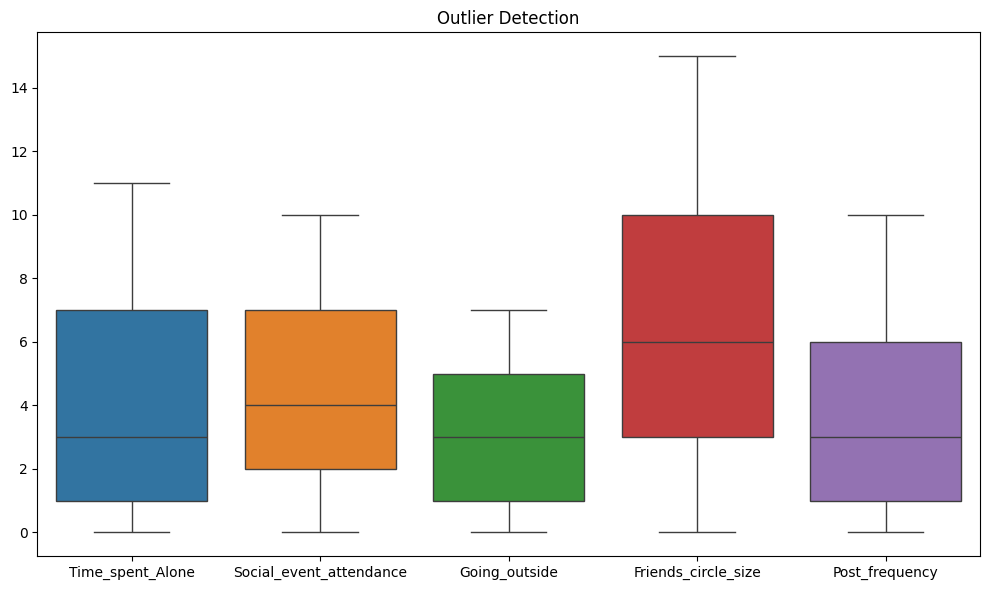

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Outlier Detection")
sns.boxplot(data=data)
plt.tight_layout()
plt.show()

### Univariate Analysis

Pada tahap ini dilakukan Univariate analysis untuk memahami distribusi dan karakteristik masing-masing fitur secara terpisah.

Kode berikut digunakan untuk melihat frekuensi dan proporsi masing-masing kategori dengan menggunakan visualisasi count plot. Analisis ini membantu dalam memahami jumlah data pada setiap kategori serta mendeteksi adanya ketidakseimbangan kelas.

            Count  Percentage
Stage_fear                   
No           1173        55.9
Yes           925        44.1 



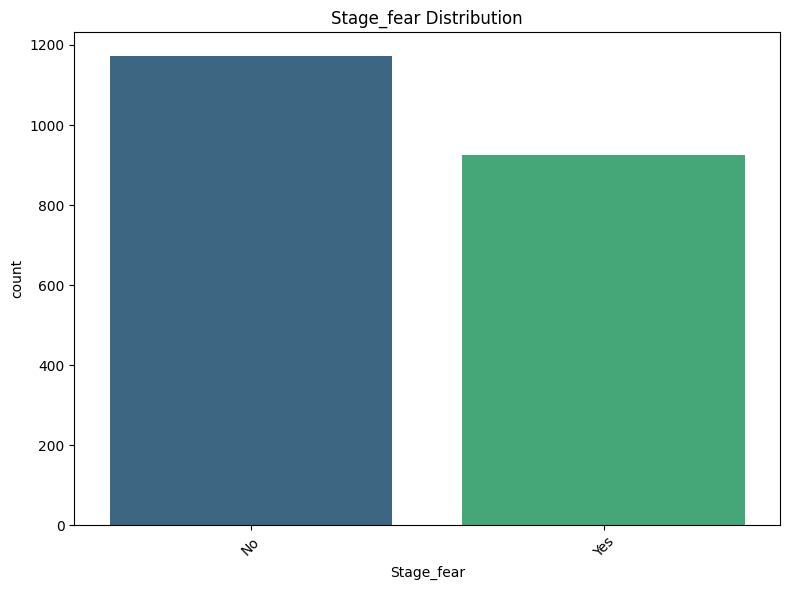

                           Count  Percentage
Drained_after_socializing                   
No                          1173        55.9
Yes                          925        44.1 



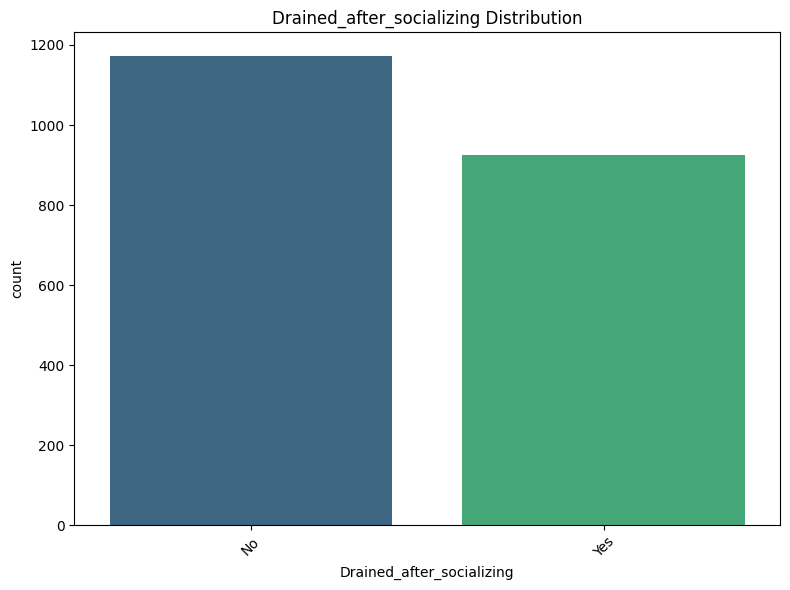

             Count  Percentage
Personality                   
Extrovert     1201        57.2
Introvert      897        42.8 



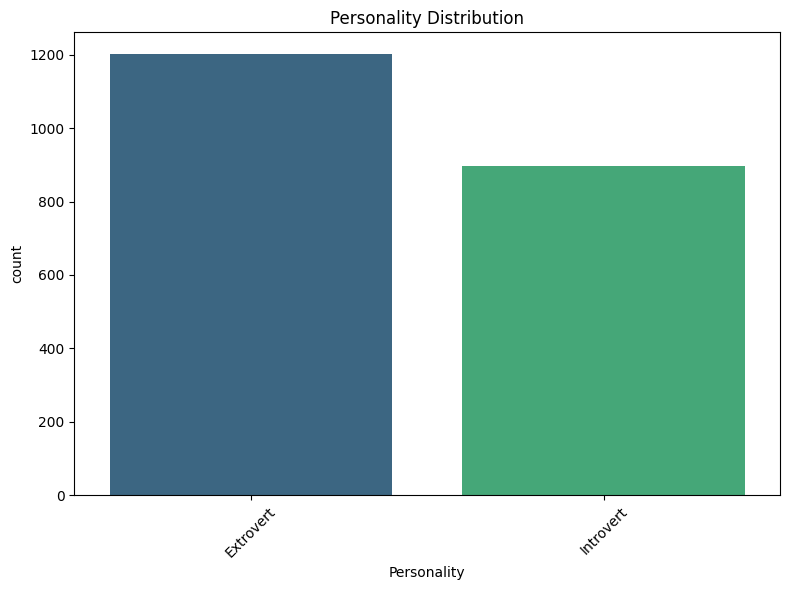

In [ ]:
cat_features = data.select_dtypes(include="object").columns

for feature in cat_features:
  count = data[feature].value_counts()
  df = pd.DataFrame({
      "Count": count,
      "Percentage": round(count/np.sum(count) * 100, 1)
  })
  print(df, "\n")
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=data, hue=feature, palette="viridis")
  plt.title(f"{feature} Distribution")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

Visualisasi berikut menggunakan fungsi .hist() dari pandas untuk menampilkan histogram fitur numerik dalam dataset. Histogram membantu memahami distribusi data, seperti pola sebaran, kecenderungan sentral, dan potensi keberadaan skewness atau multimodalitas pada setiap fitur.

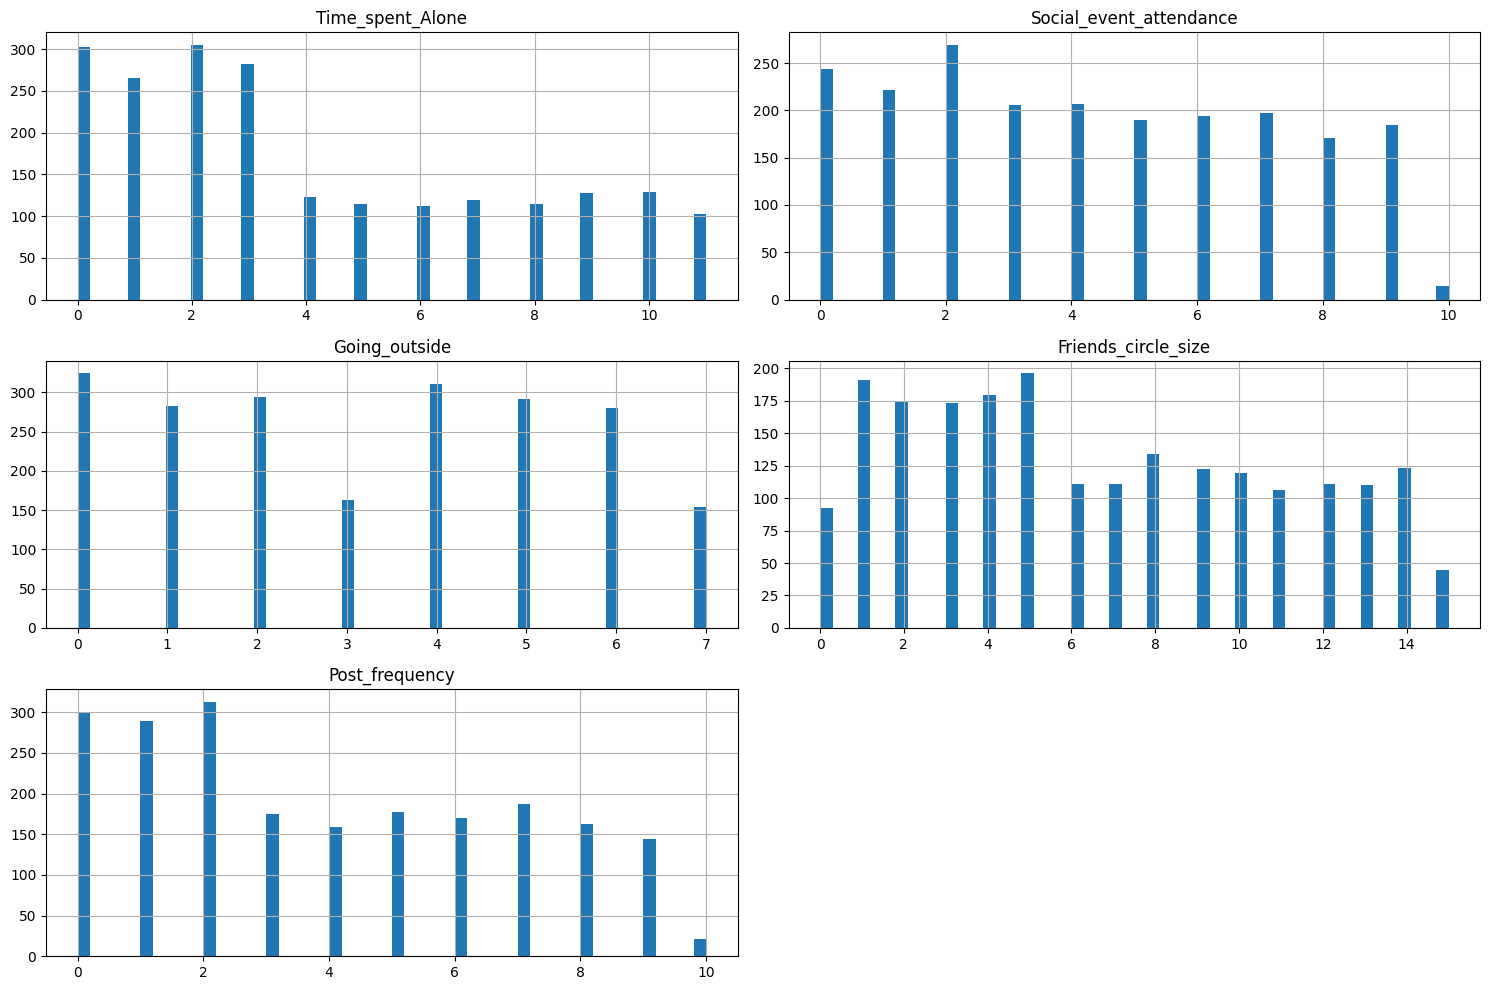

In [ ]:
data.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Multivariate Analysis

Pada tahapan ini dilakukan multivariate analysis untuk melihat hubungan antar fitur dalam dataset.

Kode berikut digunakan untuk menganalisis dan memvisualisasikan hubungan antara fitur numerik dengan label target. Hal ini membantu memahami bagaimana nilai fitur memengaruhi kelas atau kategori target dalam dataset.

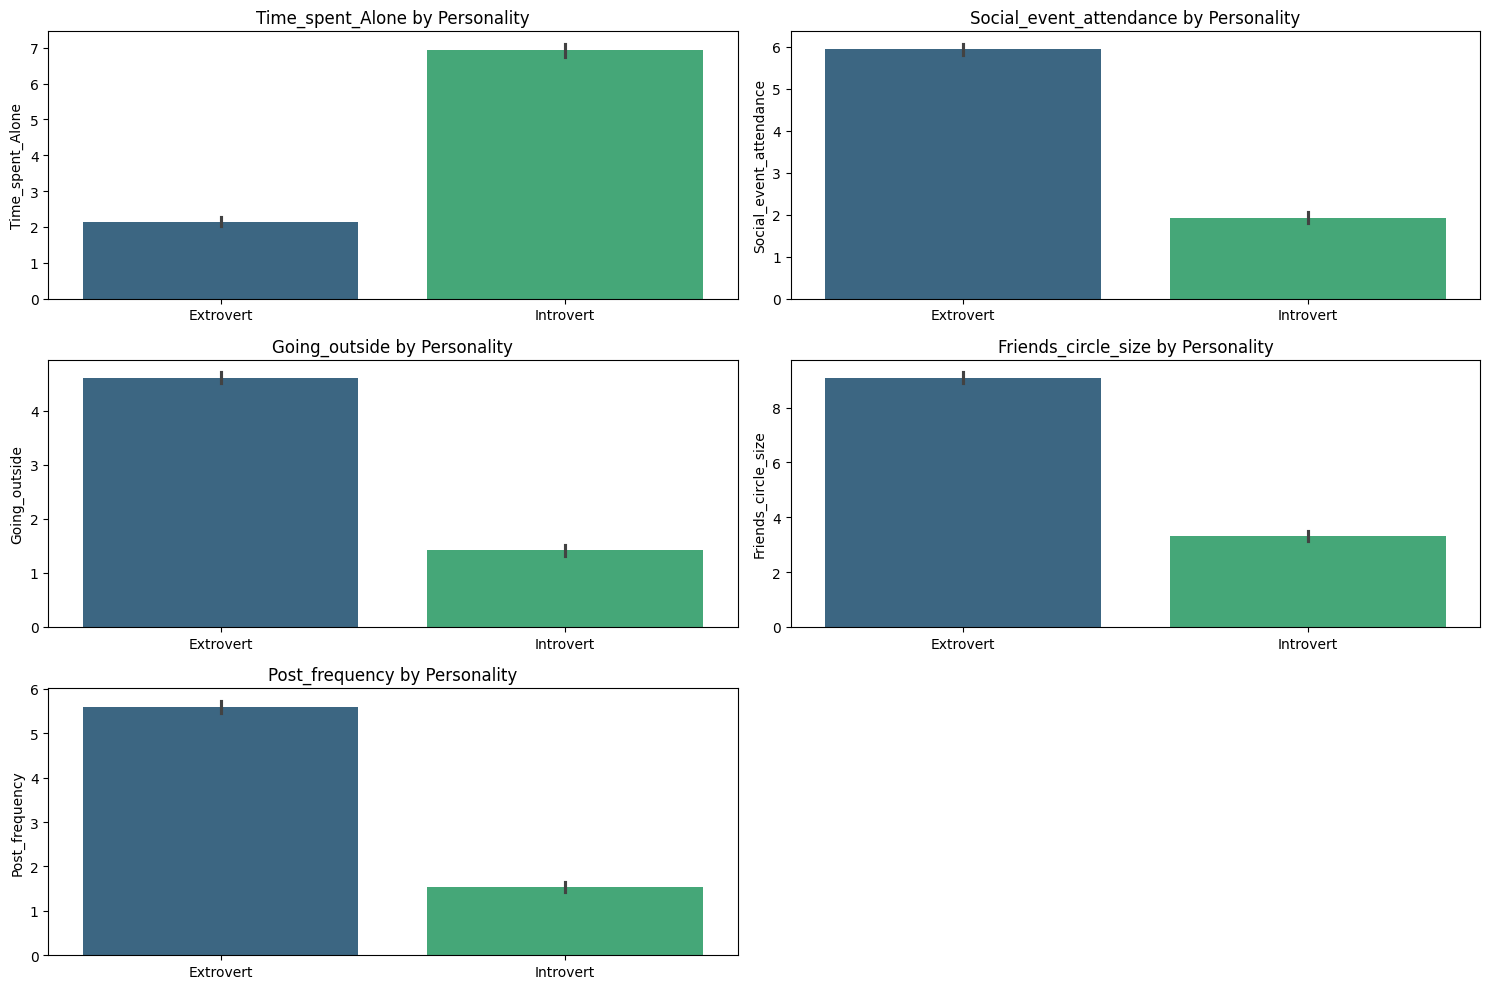

In [ ]:
num_features = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
  plt.subplot(3, 2, i)
  sns.barplot(x="Personality", y=feature, data=data, hue="Personality", palette="viridis")
  plt.title(f"{feature} by Personality")
  plt.xlabel(None)
plt.tight_layout()
plt.show()

Plot ini membantu mengidentifikasi pola, korelasi, dan distribusi fitur yang berbeda antar kelas secara visual, sehingga memudahkan pemahaman tentang bagaimana fitur-fitur tersebut berinteraksi dan berkontribusi pada klasifikasi.

<Figure size 1500x1000 with 0 Axes>

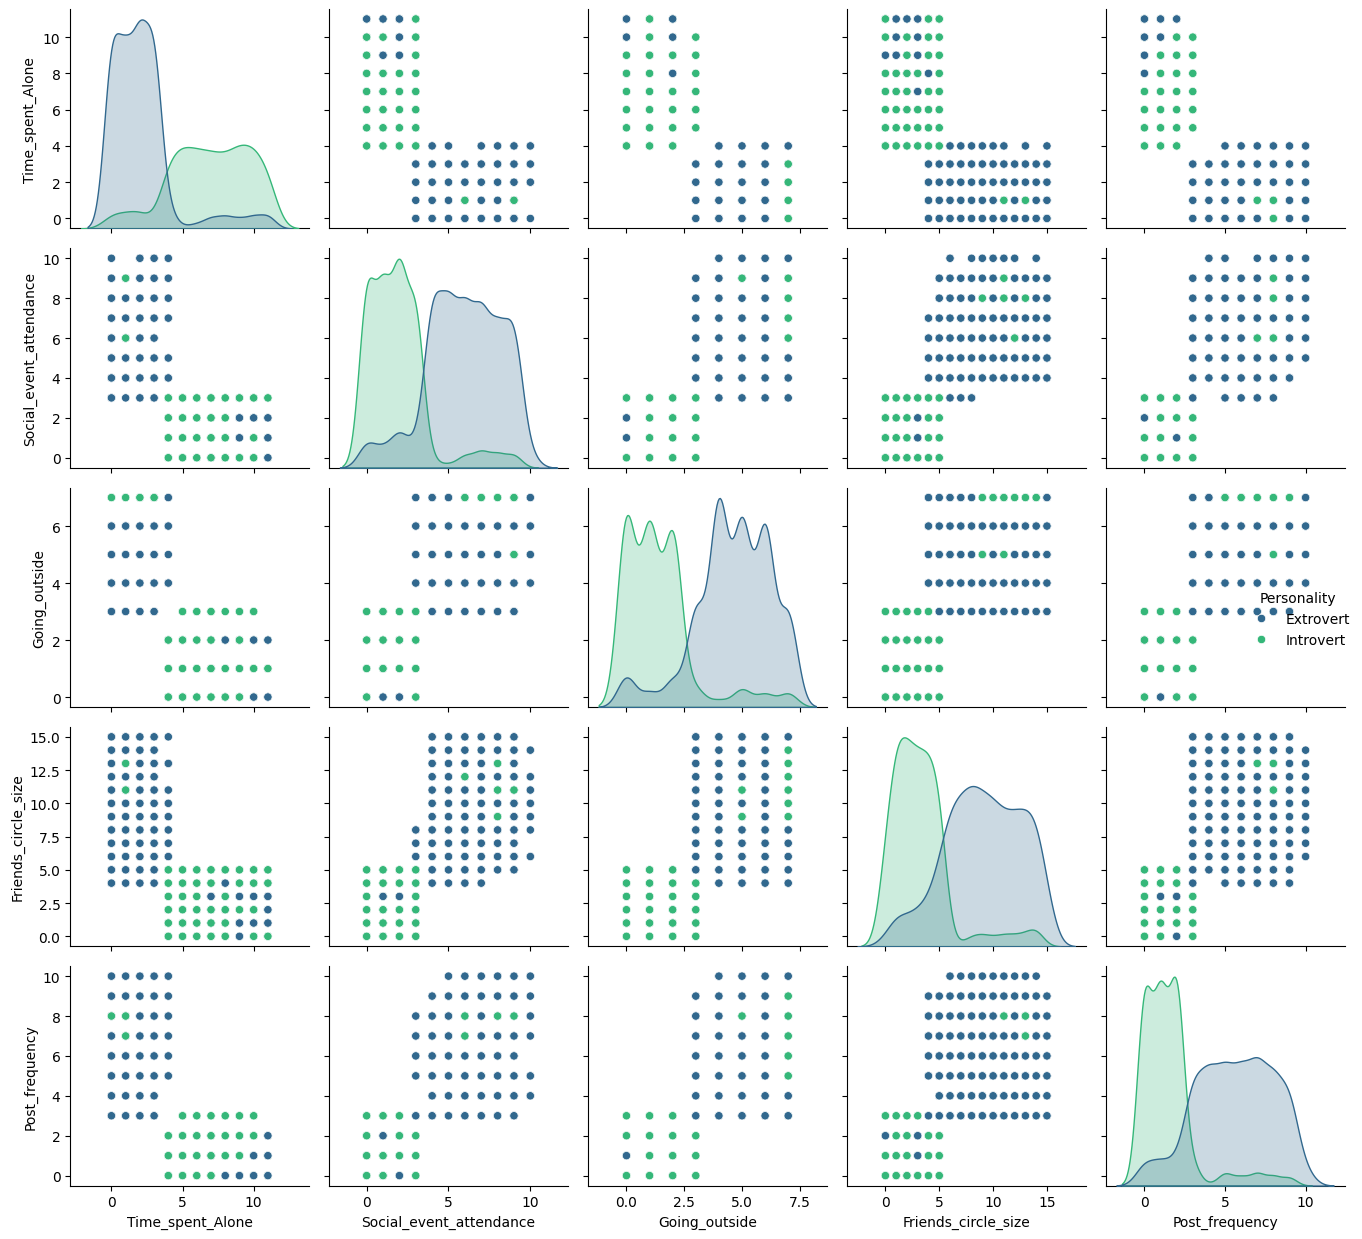

In [ ]:
plt.figure(figsize=(15, 10))
sns.pairplot(data, diag_kind="kde", hue="Personality", palette="viridis")
plt.tight_layout()

plt.show()

Visualisasi heatmap digunakan untuk menampilkan matriks korelasi antar fitur numerik dalam dataset. Analisis ini membantu mengidentifikasi fitur-fitur yang saling berkaitan erat sehingga dapat dipertimbangkan dalam pemilihan fitur untuk model.

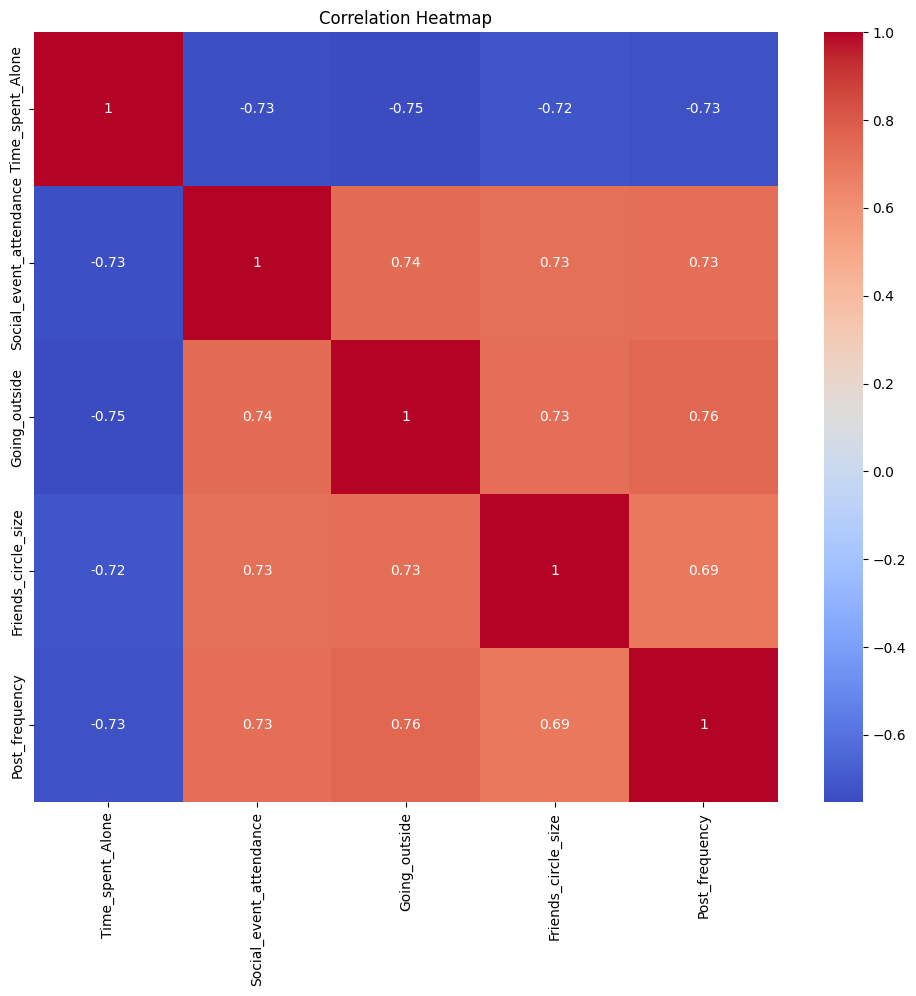

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Data Preperation

Pada tahap ini, dataset dipersiapkan agar siap digunakan dalam proses pemodelan machine learning. Beberapa langkah penting yang dilakukan antara lain:

- Pembersihan Data
- Encoding Kategori
- Pembagian Dataset
- Feature Scaling

### Encoding Feature

Kode berikut digunakan untuk melakukan proses encoding yang mengubah fitur kategori menjadi representasi numerik. Teknik yang digunakan adalah one-hot encoding, yang membuat kolom baru untuk setiap kategori unik sehingga model machine learning dapat memproses data tersebut dengan lebih baik.

In [ ]:
feature_to_encode = ["Stage_fear", "Drained_after_socializing"]

data_encoding = pd.get_dummies(data, columns=feature_to_encode)
data_encoding.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,Extrovert,True,False,True,False
1,9.0,0.0,0.0,0.0,3.0,Introvert,False,True,False,True
2,9.0,1.0,2.0,5.0,2.0,Introvert,False,True,False,True
3,0.0,6.0,7.0,14.0,8.0,Extrovert,True,False,True,False
4,3.0,9.0,4.0,8.0,5.0,Extrovert,True,False,True,False


### Split Dataset

Pada tahapan ini, dataset dibagi menjadi tiga bagian yaitu train, validation, dan test set menggunakan fungsi train_test_split(). Pembagian ini bertujuan untuk melatih model pada data training, melakukan penyesuaian parameter pada data validation, serta menguji performa akhir model pada data test secara objektif.

In [ ]:
x = data_encoding.drop(["Personality"], axis=1)
y = data_encoding["Personality"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of y_val: ", y_val.shape)

Shape of X_train:  (1678, 9)
Shape of X_test:  (210, 9)
Shape of X_val:  (210, 9)
Shape of y_train:  (1678,)
Shape of y_test:  (210,)
Shape of y_val:  (210,)


### Normalization

Kode berikut berguna untuk normalization menggunakan MinMaxScaler yang mengubah mengubah skala fitur numerik agar nilainya berada dalam rentang 0 hingga 1. Proses ini penting agar setiap fitur memiliki kontribusi yang seimbang saat pelatihan model, menghindari dominasi fitur dengan nilai besar dan meningkatkan konvergensi algoritma machine learning.

In [ ]:
min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X_val = min_max_scaler.transform(X_val)

## Model Development

Pada tahap ini dilakukan pengembangan model dengan menggunakan tiga algoritma berbeda, yaitu K-Nearest Neighbors (KNN), Decision Tree, dan Support Vector Machine (SVM). Pendekatan ini bertujuan untuk membandingkan performa masing-masing model dalam menyelesaikan masalah klasifikasi yang dihadapi.

### Model Training

Kode berikut digunakan untuk menginisiasi tiga model machine learning yang akan digunakan dalam pengembangan, yaitu K-Nearest Neighbors dengan 10 tetangga terdekat, Decision Tree dengan pengaturan random state untuk reproducibility, dan Support Vector Machine juga dengan random state yang sama.

In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

Model dilatih menggunakan data training untuk memperoleh nilai akurasi pada data training (train_accuracy) dan data validasi (val_accuracy). Hasil evaluasi tersebut kemudian disimpan dalam sebuah DataFrame bernama models_result untuk memudahkan perbandingan performa antar model.

In [ ]:
models_result = pd.DataFrame(index=["KNN", "Decision Tree", "SVM"],
                             columns=["train_accuracy", "val_accuracy"])

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_val)
  models_result.loc[name, "train_accuracy"] = accuracy_score(y_train, y_pred_train)
  models_result.loc[name, "val_accuracy"] = accuracy_score(y_val, y_pred_test)

models_result

,train_accuracy,val_accuracy
KNN,0.9118,0.919048
Decision Tree,0.97795,0.77619
SVM,0.911204,0.919048


Kode berikut digunakan untuk memvisualisasikan hasil akurasi dari masing-masing model yang tersimpan dalam DataFrame models_result. Grafik batang ini memperlihatkan perbandingan akurasi pada data training dan validasi.

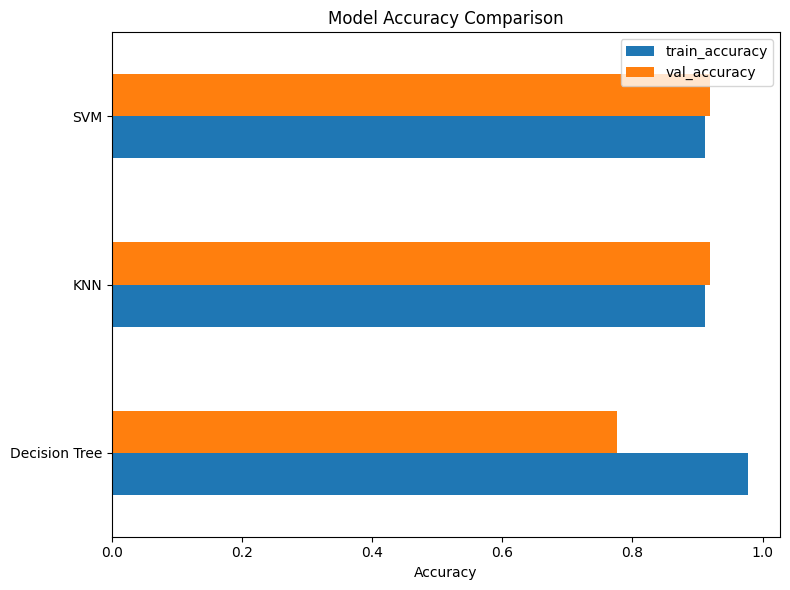

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
models_result.sort_values(by="val_accuracy", ascending=True).plot(kind="barh", ax=ax)
ax.set_title("Model Accuracy Comparison")
ax.set_xlabel("Accuracy")
ax.set_ylabel(None)
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

Pada tahap ini dilakukan hyperparameter tuning pada model terbaik menggunakan GridSearchCV. Proses ini mencari kombinasi parameter terbaik dari beberapa kandidat yang ditentukan, dengan menggunakan validasi silang (cross-validation) untuk meningkatkan performa model dan menghindari overfitting.

In [ ]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["auto", "scale", 0.01, 0.001],
    "kernel": ["linear", "rbf", "poly"]
}

grid_search = GridSearchCV(
    models["SVM"],
    param_grid,
    cv=5,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

grid_search_score = best_model.score(X_val, y_val)
print("Grid Search Accuracy Score:", grid_search_score)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Grid Search Accuracy Score: 0.919047619047619


### Model Evaluation

Kode berikut digunakan untuk melakukan prediksi menggunakan model terbaik pada data testing. Selanjutnya, hasil prediksi dievaluasi dengan menggunakan classification report untuk melihat metrik seperti precision, recall, dan f1-score, serta confusion matrix yang divisualisasikan dengan heatmap untuk memudahkan analisis kesalahan klasifikasi.

              precision    recall  f1-score   support

   Extrovert       0.96      0.94      0.95       124
   Introvert       0.92      0.94      0.93        86

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



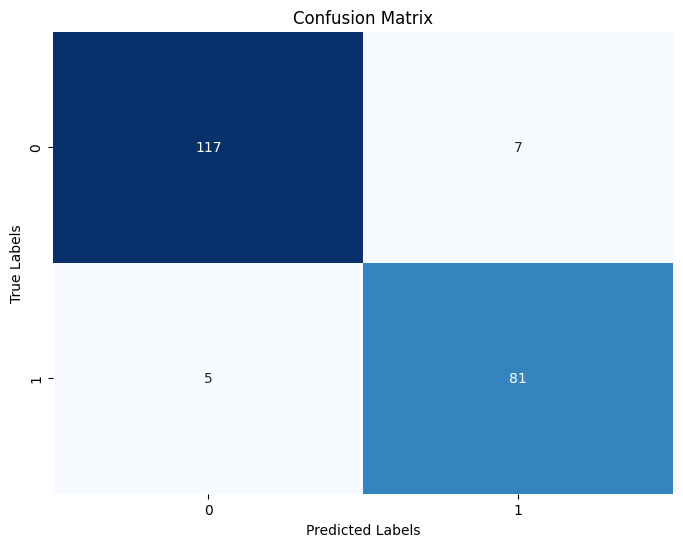

In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()